# 1. 패키지 import 및 데이터 경로 설정

In [1]:
import numpy as np
import pandas as pd
import pdb
import os, sys
import matplotlib.pyplot as plt

In [2]:
data_path = f"{os.getcwd()}/dataset/BookRecommendation"

In [3]:
os.listdir(data_path)

['Books.csv',
 'classicRec.png',
 'DeepRec.png',
 'Ratings.csv',
 'recsys_taxonomy2.png',
 'Users.csv']

In [4]:
books_df = pd.read_csv(f'{data_path}/Books.csv', low_memory=False)
ratings_df = pd.read_csv(f'{data_path}/Ratings.csv')
users_df = pd.read_csv(f'{data_path}/Users.csv')

# 2. 데이터 불러오기

In [5]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
df_li = [books_df, ratings_df, users_df]

for df in df_li:
    print(df.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


# 3. 데이터 줄이기
* MemoryError로 인해 Similarity matrix 계산 불가능

In [9]:
ratings_count = ratings_df.groupby('User-ID').count()

print(len(ratings_count)) # 105283
print(len(ratings_count[ratings_count['Book-Rating'] >= 10])) # 13097

105283
13097


In [10]:
rate_one = ratings_count.index
rate_ten = ratings_count[ratings_count['Book-Rating'] >= 10].index

In [11]:
ratings_one_df = ratings_df[ratings_df['User-ID'].isin(rate_one)]
ratings_ten_df = ratings_df[ratings_df['User-ID'].isin(rate_ten)]

In [12]:
print(len(ratings_one_df))
print(len(ratings_ten_df))

1149780
965713


In [13]:
ratings_ten_df.head()

,User-ID,ISBN,Book-Rating
31,276762,034544003X,0
32,276762,0380000059,0
33,276762,0380711524,5
34,276762,0451167317,0
35,276762,0451454952,0


# 4. Surprise로 기본적인 알고리즘 테스트
* KNN, KNN with Means
```
Model = KNNBasic            , K = 10, Sim = pearson, RMSE = 4.0319
Model = KNNWithMeans        , K = 10, Sim = pearson, RMSE = 3.6443
Model = KNNBasic            , K = 20, Sim = pearson, RMSE = 4.0265
Model = KNNWithMeans        , K = 20, Sim = pearson, RMSE = 3.6391
Model = KNNBasic            , K = 40, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 40, Sim = pearson, RMSE = 3.6380
Model = KNNBasic            , K = 80, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 80, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 160, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 160, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 320, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 320, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 640, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 640, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 1280, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 1280, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 10, Sim = cosine, RMSE = 4.0319
Model = KNNWithMeans        , K = 10, Sim = cosine, RMSE = 3.6443
Model = KNNBasic            , K = 20, Sim = cosine, RMSE = 4.0265
Model = KNNWithMeans        , K = 20, Sim = cosine, RMSE = 3.6391
Model = KNNBasic            , K = 40, Sim = cosine, RMSE = 4.0256
Model = KNNWithMeans        , K = 40, Sim = cosine, RMSE = 3.6380
Model = KNNBasic            , K = 80, Sim = cosine, RMSE = 4.0256
Model = KNNWithMeans        , K = 80, Sim = cosine, RMSE = 3.6378
Model = KNNBasic            , K = 160, Sim = cosine, RMSE = 4.0256
Model = KNNWithMeans        , K = 160, Sim = cosine, RMSE = 3.6378
Model = KNNBasic            , K = 320, Sim = cosine, RMSE = 4.0256
Model = KNNWithMeans        , K = 320, Sim = cosine, RMSE = 3.6378
Model = KNNBasic            , K = 640, Sim = cosine, RMSE = 4.0256
Model = KNNWithMeans        , K = 640, Sim = cosine, RMSE = 3.6378
Model = KNNBasic            , K = 1280, Sim = cosine, RMSE = 4.0256
Model = KNNWithMeans        , K = 1280, Sim = cosine, RMSE = 3.6378
```

In [14]:
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader

# x = ratings_one_df.copy() # 데이터 너무 많음
x = ratings_ten_df.copy()

reader = Reader(rating_scale=(min(x['Book-Rating']), max(x['Book-Rating'])))

x = Dataset.load_from_df(x[['User-ID', 'ISBN', 'Book-Rating']], reader)

x_train, x_test = train_test_split(x, test_size=0.2, random_state=1234)

In [15]:
from surprise import accuracy
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans

model_dict = {
    "KNNBasic": KNNBasic,
    "KNNWithMeans": KNNWithMeans,
}

sim_li = [
    'pearson',
    'cosine'
]

# 아래 반복문에 대한 결과는 위 마크다운에 기록하였음
# 오래 걸려서 결과만 기록하고, 주석 처리 해둠
'''
for sim in sim_li:
    for k in [10, 20, 40, 80, 160, 320, 640, 1280]:
        for key, model in model_dict.items():
            # 알고리즘 옵션 변경, 정확도 계산
            sim_options = {'name': 'pearson_baseline',
                           'user_based': True}
            
            algo = model(k=k, sim_options=sim_options, verbose=False)
            algo.fit(x_train)
            
            predictions = algo.test(x_test, verbose=False)
            
            print(f"Model = {key:20s} | K = {k} | Sim = {sim} | RMSE = {accuracy.rmse(predictions, verbose=False):.4f}")
'''

Model = KNNBasic            , K = 10, Sim = pearson, RMSE = 4.0319
Model = KNNWithMeans        , K = 10, Sim = pearson, RMSE = 3.6443
Model = KNNBasic            , K = 20, Sim = pearson, RMSE = 4.0265
Model = KNNWithMeans        , K = 20, Sim = pearson, RMSE = 3.6391
Model = KNNBasic            , K = 40, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 40, Sim = pearson, RMSE = 3.6380
Model = KNNBasic            , K = 80, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 80, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 160, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 160, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 320, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 320, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 640, Sim = pearson, RMSE = 4.0256
Model = KNNWithMeans        , K = 640, Sim = pearson, RMSE = 3.6378
Model = KNNBasic            , K = 1280, Sim = pearson, R

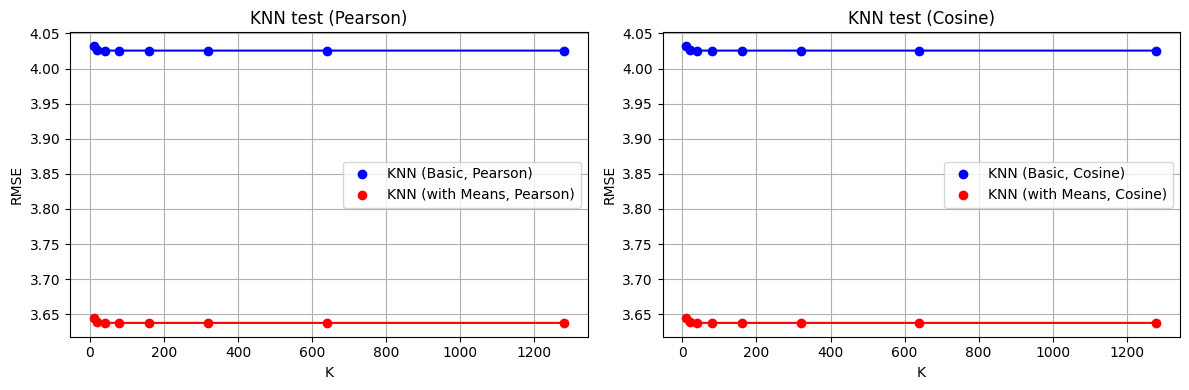

In [33]:
K = [10, 20, 40, 80, 160, 320, 640, 1280]
knn_basics_rmse_pearson = [4.0319, 4.0265, 4.0256, 4.0256, 4.0256, 4.0256, 4.0256, 4.0256]
knn_with_means_rmse_pearson = [3.6443, 3.6391, 3.6380, 3.6378, 3.6378, 3.6378, 3.6378, 3.6378]

knn_basics_rmse_cosine = [4.0319, 4.0265, 4.0256, 4.0256, 4.0256, 4.0256, 4.0256, 4.0256]
knn_with_means_rmse_cosine = [3.6443, 3.6391, 3.6380, 3.6378, 3.6378, 3.6378, 3.6378, 3.6378]

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)

plt.title("KNN test (Pearson)")
plt.grid(zorder=1)

plt.plot(K, knn_basics_rmse_pearson, color='blue', zorder=2)
plt.scatter(K, knn_basics_rmse_pearson, label="KNN (Basic, Pearson)", color='blue', zorder=2)

plt.plot(K, knn_with_means_rmse_pearson, color='red', zorder=2)
plt.scatter(K, knn_with_means_rmse_pearson, label="KNN (with Means, Pearson)", color='red', zorder=2)

plt.ylabel('RMSE')
plt.xlabel('K')

plt.legend()

plt.subplot(1, 2, 2)

plt.title("KNN test (Cosine)")
plt.grid(zorder=1)

plt.plot(K, knn_basics_rmse_pearson, color='blue', zorder=2)
plt.scatter(K, knn_basics_rmse_pearson, label="KNN (Basic, Cosine)", color='blue', zorder=2)

plt.plot(K, knn_with_means_rmse_pearson, color='red', zorder=2)
plt.scatter(K, knn_with_means_rmse_pearson, label="KNN (with Means, Cosine)", color='red', zorder=2)

plt.ylabel('RMSE')
plt.xlabel('K')

plt.legend()

plt.tight_layout()
plt.savefig("assets/KNN results.jpg", dpi=500)

13097
4948
8149


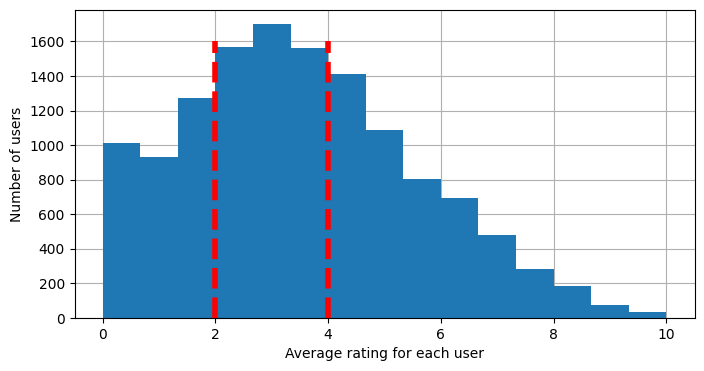

In [51]:
plt.figure(figsize=(8, 4))

plt.grid(zorder=1)
plt.hist(ratings_ten_df.groupby('User-ID')['Book-Rating'].mean(), bins=15, zorder=2)

plt.plot([2, 2], [0, 1600], color='red', linewidth=4, linestyle='--')
plt.plot([4, 4], [0, 1600], color='red', linewidth=4, linestyle='--')
plt.ylabel('Number of users')
plt.xlabel('Average rating for each user')

plt.savefig('assets/average_rating_for_each_user.jpg', dpi=500)

temp_df = ratings_ten_df.groupby('User-ID')['Book-Rating'].mean()
print(len(temp_df))
print(len(temp_df[(temp_df >= 2.0) & (temp_df <= 4.0)]))
print(len(temp_df) - len(temp_df[(temp_df >= 2.0) & (temp_df <= 4.0)]))